In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [18]:
x_data = np.arange(1910,2001,10)
y_data = np.array([92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906])
N = np.size(x_data)

$$
B = 
\begin{pmatrix}
\varphi_1(x_1)& ... & \varphi_1(x_n)\\
&.....&\\
\varphi_n(x_1)& ... & \varphi_n(x_n)
\end{pmatrix}\\
A = B B^{T} =
\begin{pmatrix}
(\varphi_1,\varphi_1)& ... & (\varphi_1,\varphi_n)\\
&.....&\\
(\varphi_n,\varphi_1)& ... & (\varphi_n,\varphi_n)
\end{pmatrix}
$$

# Пункт А

In [19]:
B = np.polynomial.polynomial.polyval(x_data,np.eye(5))
A = B@B.transpose()
F = B@y_data

In [24]:
c_1 = np.linalg.solve(A,F)
x_plot = np.arange(1910,2001,0.1)
y_plot = np.polynomial.polynomial.polyval(x_plot,c_1)

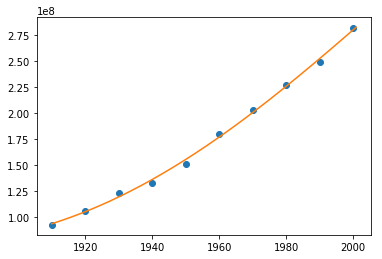

In [26]:
fig = plt.figure()
plt.plot(x_data,y_data,"o")
plt.plot(x_plot,y_plot)
plt.show()

# Пункт Б

In [36]:
z_data = x_data - 1910

In [31]:
B = np.polynomial.polynomial.polyval(z_data,np.eye(5))
A = B@B.transpose()
F = B@y_data

In [32]:
c_2 = np.linalg.solve(A,F)
z_plot = np.arange(0,91,0.1)
yz_plot = np.polynomial.polynomial.polyval(z_plot,c_2)

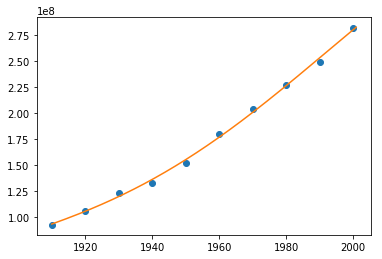

In [33]:
fig_2 = plt.figure()
plt.plot(x_data,y_data,"o")
plt.plot(z_plot+1910,yz_plot)
plt.show()

# Разница многочленов

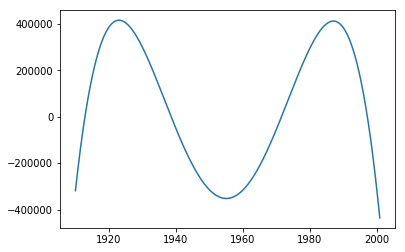

In [35]:
fig = plt.figure()
plt.plot(x_plot,yz_plot - y_plot) 
plt.show()

In [41]:
Phi_1 = (np.linalg.norm((np.polynomial.polynomial.polyval(x_data,c_1) - y_data),2))**2
Phi_2 = (np.linalg.norm((np.polynomial.polynomial.polyval(z_data,c_2) - y_data),2))**2

In [42]:
print(Phi_1)
print(Phi_2)

79273430285562.2
78394458177872.95
